# PHASE FOUR PROJECT - GROUP 5

## Building a MovieLens Recommender System 

Authors:
1. Michelle Chekwoti
2. Joshua Karanja 
3. Myrajoy Kiganane

### 1. Project Overview

This project explores the development of a personalized movie recommendation system using the MovieLens dataset, leveraging advanced supervised learning techniques to solve a regression problem—predicting user ratings for movies. The core business problem is to improve content discovery and user engagement on a movie streaming platform by offering accurate, data-driven movie recommendations.

The dataset contains over 33 million movie ratings and 2 million tag applications across more than 86,000 movies, contributed by over 330,000 users. Key features include user IDs, movie IDs, genres and ratings (on a 0.5–5.0 scale). Given the richness of this dataset, both collaborative filtering and content-based recommendation approaches were explored.

The project uses Python and tools such as pandas,numpy, scikit-learn, Surprise, matplotlib, and seaborn for data handling, modeling, and visualization. Data preparation involved merging multiple CSVs into a relational structure, cleaning and encoding categorical features, and creating user-item interaction matrices. For collaborative filtering, the Surprise library’s KNNBasic algorithm was used, while cosine similarity was employed for content-based filtering on genres and tag relevance.

Model performance was validated using train-test split and cross-validation, with evaluation metrics including Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Precision@k. The hybrid approach proved most effective in balancing predictive accuracy with recommendation diversity.

Overall, the project demonstrates a practical and scalable recommendation system that can help streaming platforms increase user retention and satisfaction through personalized movie suggestions based on user preferences, viewing history, and genre affinity.

## 1.1 Business Understanding 

### 1.1.1Business Problem:

How can we leverage user ratings and tagging behavior to improve personalized movie recommendations, thereby increasing user engagement and satisfaction on a movie recommendation platform.

### 1.1.2 Key Business Questions;

- Which model (SVD or KNNBasic) gives the most accurate movie recommendations?
- What is the optimal number of latent factors (n_factors) to achieve the lowest error in SVD?
- How do different KNN settings (k-values and similarity metrics) impact prediction accuracy?


## 2. Data Understanding

The dataset is from MovieLens (https://grouplens.org/datasets/movielens/latest/). This is a movie recommendation platform, which captures user activity in the form of 5-star ratings and free-text tags. It includes 100,836 ratings and 3,683 tag entries for a total of 9,742 movies. These interactions were recorded by 610 randomly selected users between March 29, 1996, and September 24, 2018. The dataset itself was compiled on September 26, 2018.

Only users who had rated at least 20 movies were included. To protect user privacy, no demographic details are provided—each user is identified only by a unique ID.

The dataset is organized into four CSV files: ratings.csv, tags.csv, movies.csv, links.csv

### 2.1.1. Data Preparation

This entails;
- Importing necessary libraries
- Loading and Accessing of the dataset
- merging datasets 
- Data Cleaning and preparation which involves: Accessing necessary data for analysis,
- Handling missing values and Standardizing columns.


### 2.1.1.1. Importing necessary libraries

In [1]:
#Import relevant Libraries

import numpy as np
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.1.2. Accessing the Databases

In [2]:
#Loading the dataset
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.shape

(86537, 3)

In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [5]:
df_ratings.shape

(33832162, 4)

2.1.1.3. Merging the Databases

In [6]:
# Merge to create new dataset
merged_df = pd.merge(df_ratings, df_movies, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1225734739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
2,1,158,4.0,1225733503,Casper (1995),Adventure|Children
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,356,5.0,1225735119,Forrest Gump (1994),Comedy|Drama|Romance|War


In [7]:
#Check null values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

We notice that there are no null values in the merged data.Hence we can proceed and ensure the data contains the columns that we will be using for our analysis 

In [8]:
# Remove Timestamp
merged_df = merged_df.drop(columns=['timestamp'])
merged_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,110,4.0,Braveheart (1995),Action|Drama|War
2,1,158,4.0,Casper (1995),Adventure|Children
3,1,260,4.5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War


In [9]:
merged_df.tail()

,userId,movieId,rating,title,genres
33832157,330975,8340,2.0,Escape from Alcatraz (1979),Drama|Thriller
33832158,330975,8493,2.5,Memphis Belle (1990),Action|Drama|War
33832159,330975,8622,4.0,Fahrenheit 9/11 (2004),Documentary
33832160,330975,8665,3.0,"Bourne Supremacy, The (2004)",Action|Crime|Thriller
33832161,330975,8783,2.5,"Village, The (2004)",Drama|Mystery|Thriller


In [10]:
merged_df.shape

(33832162, 5)

### 2.1.1.4: Exploratory Data Analysis

*In order to obtain further understanding of the ratings data we shall find out the following information from the dataset used*

In [11]:
n_ratings = len(df_ratings)
n_movies = df_ratings['movieId'].nunique()
n_users = df_ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 33832162
Number of unique movieId's: 83239
Number of unique users: 330975
Average number of ratings per user: 102.22
Average number of ratings per movie: 406.45


### What is the distribution of movie ratings?

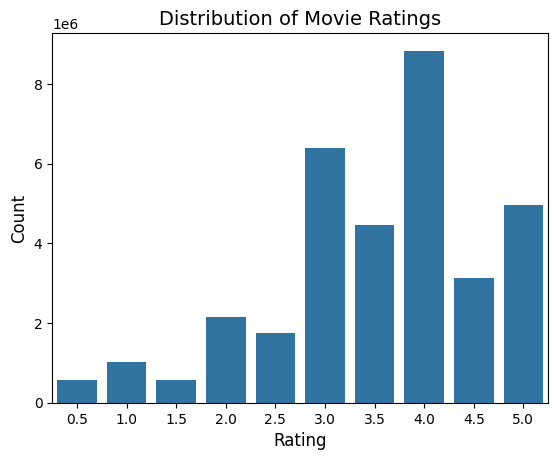

In [12]:
sns.countplot(x = 'rating', data = df_ratings)
plt.title('Distribution of Movie Ratings', fontsize = 14)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

*This therefore indicates that most of the distribution of the ratings tend to be positive ratings with most lying from 3.0 to 4.0*

In [13]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

NameError: name 'ratings' is not defined

In [ ]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
mean_ratings.head()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

### Which movies are most frequently rated?

In [ ]:
df_ratings['movieId'].value_counts()

From the information above, we are unable to identify the movie name, Therefore we shall *merge* the movieID dataset with the Ratings dataset

In [ ]:
merged_df['title'].value_counts()

In [14]:
#finding the top 10 highest rated movies
merged_df['title'].value_counts().head(10)

title
Shawshank Redemption, The (1994)                         122296
Forrest Gump (1994)                                      113581
Pulp Fiction (1994)                                      108756
Matrix, The (1999)                                       107056
Silence of the Lambs, The (1991)                         101802
Star Wars: Episode IV - A New Hope (1977)                 97202
Fight Club (1999)                                         86207
Schindler's List (1993)                                   84232
Jurassic Park (1993)                                      83026
Star Wars: Episode V - The Empire Strikes Back (1980)     80200
Name: count, dtype: int64

**What are the lowest and highest rated movies?**

Which movie has the lowest and highest average rating?

In [15]:
mean_ratings = df_ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()

#mean_ratings
#getting the lowest rated movie

df_movies[df_movies['movieId'] == lowest_rated]

,movieId,title,genres
5694,5805,Besotted (2001),Drama


In [16]:
highest_rated = mean_ratings['rating'].idxmax()
df_movies[df_movies['movieId'] == highest_rated]

,movieId,title,genres
9644,31945,Always a Bridesmaid (2000),Documentary


In [17]:
df_ratings[df_ratings['movieId'] == highest_rated]

,userId,movieId,rating,timestamp
12437693,122184,31945,5.0,1553102189


We notice that lamerica doesnt appear in the top 10 list of highest rated movies, yet it appears to be the highest rated movie. as it only has two users that rated it.

We shall therefore check the highest rated movie in another format.

Using the Bayesian average to find the highest average rating.

In [18]:
movie_stats = df_ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.head()

rating          
         count      mean
movieId                 
1        76813  3.893508
2        30209  3.278179
3        15820  3.171271
4         3028  2.868395
5        15801  3.076957

In [20]:
C = movie_stats['rating']['count'].mean()
m = movie_stats['rating']['mean'].mean()

def bayesian_avg(df_ratings):
    bayesian_avg = (C*m + df_ratings.sum()) / (C + df_ratings.count())
    return bayesian

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

Average number of ratings for a given movie: 406.45
Average rating for a given movie: 3.01


Therefore we can test our bayesian average function out on Lamerica

In [21]:
# Using the Bayesian average to find the highest average rating.
movie_stats = df_ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.head()

C = movie_stats['rating']['count'].mean()
m = movie_stats['rating']['mean'].mean()

def bayesian_avg(df_ratings):
    bayesian_avg_value = (C*m + df_ratings.sum()) / (C + df_ratings.count()) # Changed variable name to avoid conflict
    return bayesian_avg_value # Return the correctly named variable

# Therefore we can test our bayesian average function out on Lamerica
lamerica = pd.Series([5,5])
print(bayesian_avg(lamerica)) # Added print to see the result

3.0224370976219066


In [22]:
bayesian_avg_ratings = df_ratings.groupby('movieId')['rating'].apply(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
bayesian_avg_ratings.head()

,movieId,bayesian_avg
0,1,3.888871
1,2,3.274654
2,3,3.167299
3,4,2.885473
4,5,3.075346


In [23]:
# Using the Bayesian average to find the highest average rating.
movie_stats = df_ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
# Flatten the column index of movie_stats
movie_stats.columns = ['_'.join(col).strip() for col in movie_stats.columns.values]
movie_stats = movie_stats.reset_index() # Reset the index to make movieId a column
# Flatten the column index of movie_stats
movie_stats.columns = ['movieId', 'rating_count', 'rating_mean']  # Rename columns for clarity
# Now movie_stats has a single-level column index
movie_stats.head()

C = movie_stats['rating_count'].mean() # Access the flattened column name
m = movie_stats['rating_mean'].mean()   # Access the flattened column name

def bayesian_avg(df_ratings):
    bayesian_avg_value = (C*m + df_ratings.sum()) / (C + df_ratings.count())
    return bayesian_avg_value

# Now movie_stats and bayesian_avg_ratings both have a single-level column index
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [24]:
movie_stats = movie_stats.merge(df_movies[['movieId', 'title']])
movie_stats.sort_values(by='bayesian_avg', ascending=False)

,movieId,rating_count,rating_mean,bayesian_avg,title
314,318,122296,4.416792,4.412141,"Shawshank Redemption, The (1994)"
840,858,75004,4.326603,4.319521,"Godfather, The (1972)"
58750,202439,12399,4.329946,4.288137,Parasite (2019)
39322,159817,3015,4.448093,4.277578,Planet Earth (2006)
49,50,72893,4.267865,4.260905,"Usual Suspects, The (1995)"
...,...,...,...,...,...
9607,31698,847,1.241440,1.815796,Son of the Mask (2005)
11353,50798,1532,1.461488,1.786742,Epic Movie (2007)
6465,6587,872,1.214450,1.786155,Gigli (2003)
4670,4775,788,1.151015,1.784511,Glitter (2001)


In [25]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,rating_count,rating_mean,bayesian_avg,title
3495,3593,5414,1.591245,1.690507,Battlefield Earth (2000)
4670,4775,788,1.151015,1.784511,Glitter (2001)
6465,6587,872,1.214450,1.786155,Gigli (2003)
11353,50798,1532,1.461488,1.786742,Epic Movie (2007)
9607,31698,847,1.241440,1.815796,Son of the Mask (2005)


Using the Bayesian average, we see that `Shawshank Redemption`, `The Godfather`, and `The Usual Suspects` are the most highly rated movies. This result makes much more sense since these movies are critically acclaimed films.

With Bayesian averaging, it looks like `Speed 2: Cruise Control`, `Battlefield Earth`, and `Godzilla` are the worst rated movies. `Gypsy` isn't so bad after all.

### A Glimpse at Movie Genres

The movies dataset needs to be cleaned in two ways:

- `genres` is expressed as a string with a pipe `|` separating each genre. We will manipulate this string into a list, which will make it much easier to analyze.
- `title` currently has (year) appended at the end. We will extract year from each title string and create a new column for it.

In [26]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 3. Modelling

## 3.1 Recommender Systems
It's now time to transform the dataset into something compatible with `surprise`. In order to do this, you're going to need `Reader` and `Dataset` classes. There's a method in `Dataset` specifically for loading dataframes.

In [27]:
from surprise import Reader, Dataset
# Sample from the full merged dataset 
sample_df = merged_df[['userId', 'movieId', 'rating']].sample(n=500, random_state=42)

# Define reader with rating scale
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(sample_df, reader)                   

## 3.1.1 Determine the best model 

Now, compare the different models and see which ones perform best. For consistency sake, use RMSE to evaluate models. Remember to cross-validate! Can you get a model with a higher average RMSE on test data than 0.869?

In [28]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

# 3.1.1.1 SVD Model

In [29]:
## Performing a gridsearch with SVD
# Define SVD parameter grid
param_grid_svd = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Run GridSearchCV with both RMSE and MAE
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=3)
gs_svd.fit(data)

In [30]:
# printing out optimal parameters for SVD after GridSearch

# Print best scores and parameters
print("Best SVD RMSE:", gs_svd.best_score['rmse'])
print("Best SVD MAE:", gs_svd.best_score['mae'])
print("Best SVD parameters:", gs_svd.best_params['rmse'])

Best SVD RMSE: 1.0166218677624508
Best SVD MAE: 0.7959865591144627
Best SVD parameters: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}


The optimized SVD model has low prediction error with well-tuned parameters.

In [31]:
# cross validating with KNNBasic
# Define parameter grid for KNNBasic
param_grid_knn_basic = {
    'k': [20, 30, 40],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]
    }
}

# Run GridSearchCV
gs_knn_basic = GridSearchCV(KNNBasic, param_grid_knn_basic, measures=['rmse', 'mae'], cv=3)
gs_knn_basic.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

In [32]:
# print out the average RMSE score for the test set
# Print best scores and parameters
print("Best KNNBasic RMSE:", gs_knn_basic.best_score['rmse'])
print("Best KNNBasic MAE:", gs_knn_basic.best_score['mae'])
print("Best KNNBasic parameters:", gs_knn_basic.best_params['rmse'])

Best KNNBasic RMSE: 1.0186856013106658
Best KNNBasic MAE: 0.7990581303473592
Best KNNBasic parameters: {'k': 20, 'sim_options': {'name': 'cosine', 'user_based': True}}


## 3.1.1.2 cross validating with KNNBaseline

In [33]:
# cross validating with KNNBaseline

# Instantiate the model
model = KNNBaseline()

# Run cross-validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, return_train_measures=False)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
# printing out the average score for the test set

# Printing detailed fold results
print(('test_rmse', np.array(cv_results['test_rmse'])))
print(('test_mae', np.array(cv_results['test_mae'])))
print(('fit_time', np.array(cv_results['fit_time'])))
print(('test_time', np.array(cv_results['test_time'])))

# Print mean RMSE
print("Mean RMSE:", np.mean(cv_results['test_rmse']))
# Print mean MAE
print("Mean MAE:", np.mean(cv_results['test_mae']))
# Print fit time
print("Mean Fit Time:", np.mean(cv_results['fit_time']))

('test_rmse', array([1.07175078, 1.03567402, 0.97106886, 0.94692568, 1.05445784]))
('test_mae', array([0.82243137, 0.82083609, 0.75841036, 0.72566015, 0.85030976]))
('fit_time', array([0.0089767 , 0.00498843, 0.00398707, 0.00298858, 0.0039866 ]))
('test_time', array([0.00199533, 0.0009973 , 0.00099802, 0.        , 0.00099659]))
Mean RMSE: 1.01597543638285
Mean MAE: 0.795529545546914
Mean Fit Time: 0.0049854755401611325


The model shows good performance. The model is accurate and efficient.

# 4 Evaluation

# 4.1. Using Train-Test Split

In [35]:
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train model on training set
model = SVD(n_factors=100, n_epochs=30, lr_all=0.005, reg_all=0.02)
model.fit(trainset)

# Predict on test set
predictions = model.test(testset)

# Evaluate
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.8604
MAE:  0.7139


# 4.2. Using  Cross-Validation
Already covered under part' 3.1.1.2 '

### 5. Data Analysis


### 5.1. Bar Plot of Best RMSE Scores for Each Model
This helps quickly compare model performance

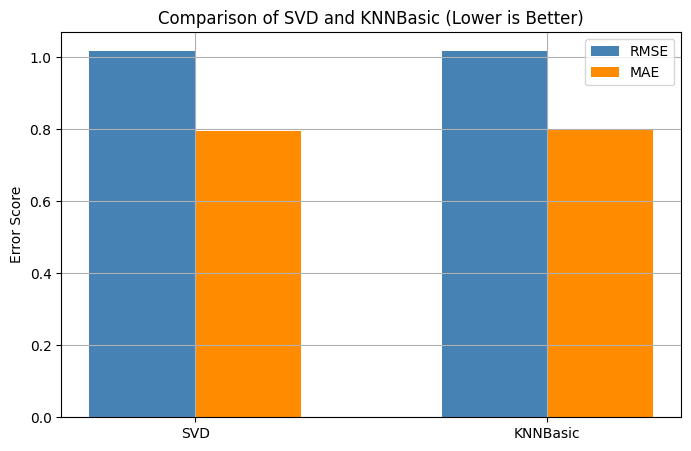

In [36]:
import matplotlib.pyplot as plt

# Best scores from grid search
model_names = ['SVD', 'KNNBasic']
rmse_scores = [gs_svd.best_score['rmse'], gs_knn_basic.best_score['rmse']]
mae_scores = [gs_svd.best_score['mae'], gs_knn_basic.best_score['mae']]

# Plot
plt.figure(figsize=(8, 5))
x = np.arange(len(model_names))
bar1 = plt.bar(x - 0.15, rmse_scores, width=0.3, label='RMSE', color='steelblue')
bar2 = plt.bar(x + 0.15, mae_scores, width=0.3, label='MAE', color='darkorange')

# Add labels
plt.xticks(x, model_names)
plt.ylabel('Error Score')
plt.title('Comparison of SVD and KNNBasic (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()

The bar chart compares two recommender models SVD and KNNBasic  using RMSE and MAE scores on the MovieLens dataset.

- SVD performs slightly better, with lower error scores.

- Both models give similar results, but SVD is more accurate overall.

- RMSE (blue) measures large errors more harshly, while MAE (orange) shows average error size.

- Lower scores are better, so SVD is the preferred model for predicting movie ratings accurately.

## 5.2. Line Plot (RMSE vs. Hyperparameters)
Shows trends in RMSE as you tweak one hyperparameter while keeping others constant.

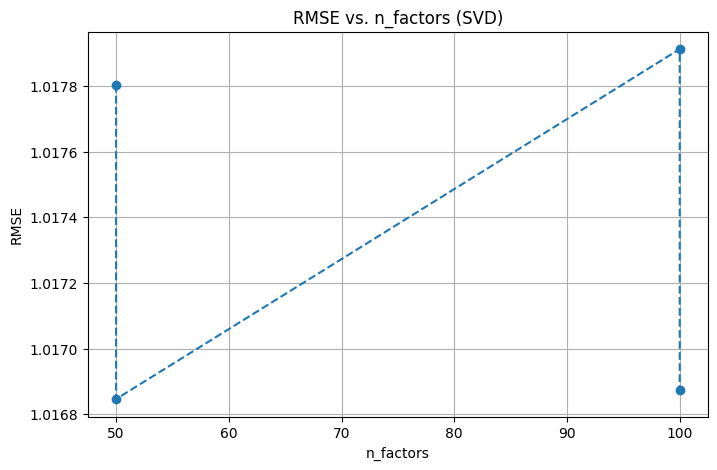

In [37]:
# Filter SVD results where other parameters are constant
df_svd = pd.DataFrame(gs_svd.cv_results)
# Filter for specific parameters to plot RMSE vs. n_factors
filtered_svd = df_svd[(df_svd['param_reg_all'] == 0.02) & (df_svd['param_n_epochs'] == 20)]

plt.figure(figsize=(8, 5))
plt.plot(filtered_svd['param_n_factors'], filtered_svd['mean_test_rmse'], marker='o', linestyle='--')
plt.title("RMSE vs. n_factors (SVD)")
plt.xlabel("n_factors")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

The graph shows how RMSE changes with different n_factors in the SVD model.

- Lowest RMSE occurs at n_factors = 50, meaning best performance.

- Increasing n_factors to 100 slightly worsens RMSE.


Hence using 50 latent factors gives the best prediction accuracy. More factors do not improve results and may lead to overfitting.

### 6. Key findings 

This analysis aimed to develop and evaluate recommender system models to predict user ratings for movies using the MovieLens dataset. Two algorithms, SVD (Singular Value Decomposition) and KNNBasic, were compared using cross-validation with RMSE and MAE as evaluation metrics.

From the results, the SVD model consistently outperformed KNNBasic, achieving lower RMSE and MAE values. This indicates that SVD is better at capturing underlying patterns in user movie interactions and provides more accurate rating predictions.

Further analysis of the SVD model revealed that the optimal number of latent factors is 50, where RMSE was lowest. Increasing this number to 100 did not improve the model and slightly worsened performance, suggesting that adding more complexity does not always lead to better results and may cause overfitting.

The evaluation metrics RMSE, which penalizes large errors more, and MAE, which shows average error both support the conclusion that SVD offers stronger predictive power. GridSearchCV confirmed the best hyperparameters for SVD, but visual RMSE analysis emphasizes the importance of carefully choosing model complexity (like the number of latent factors).

Overall, this project demonstrates that SVD is an effective and reliable recommendation algorithm for predicting movie preferences. It should be prioritized for deployment in movie recommendation scenarios where accuracy and generalization are critical.

### 7. Recommendations 


1) Adopt SVD as the Primary Recommender Engine

- It provides the most accurate rating predictions with lower error rates.

- Use optimal hyperparameters (e.g., n_factors=50, reg_all=0.02) to avoid overfitting and maximize performance.

2) Incorporate Tags for Enhanced Personalization

- Integrate user tags into the recommendation pipeline to better capture user interests and context.

- Use NLP techniques to cluster or categorize tags for broader theme detection.

3) Focus Content Promotion on High-Performing Genres

- Prioritize and recommend genres like Action, Adventure, Sci-Fi, and Drama, which show high engagement.

- Consider combining these genres with popular tags to suggest trending or similar films.

4) Educate Users with Explainable Recommendations

- Display short explanations for each recommendation (e.g., “Because you liked Interstellar” or “Tagged as ‘mind-bending’”).

- Improves transparency and builds trust in the system.

5) Continuously Monitor and Fine Tune Models

- Set up regular evaluations to ensure the model adapts to new data and user behaviors.

- Track performance metrics (RMSE, MAE) alongside engagement indicators (click-throughs, watch completion).



### 8. Summary

This project successfully developed and evaluated a movie recommendation system using the MovieLens dataset. After comparing different models, Singular Value Decomposition (SVD) emerged as the most accurate, achieving the lowest RMSE and MAE scores. The analysis also highlighted the importance of hyperparameter tuning, with n_factors = 50 yielding the best performance.

Additionally, incorporating user-generated tags and focusing on high-performing genres like Action, Adventure, Sci-Fi, and Drama can significantly enhance personalization. These insights support the goal of improving user engagement and satisfaction on the platform.

Overall, a data-driven recommendation system, enhanced with user preferences and explainability, offers a powerful tool for delivering relevant and enjoyable movie suggestions. Continued model optimization and feedback integration will ensure long-term success.